# Tutorial 4 - Logistic Regression (Binary classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("4-insurance-data.csv")
df1.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


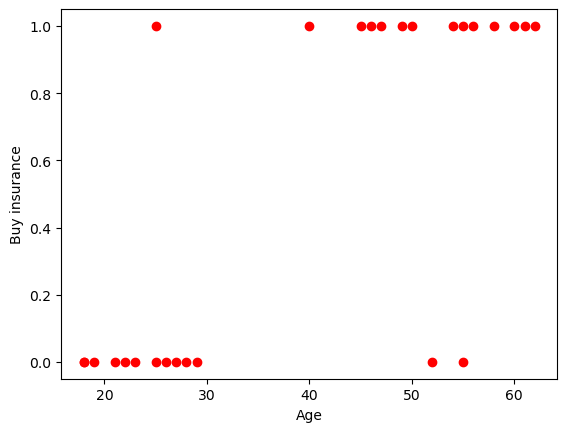

In [14]:
%matplotlib inline
plt.xlabel("Age")
plt.ylabel("Buy insurance")
plt.scatter(df1.age, df1.bought_insurance, color='r', marker='o')
plt.show()

### 1.1 Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [29]:
model1 = LinearRegression()
model1.fit(df1[["age"]], df1.bought_insurance)
print(model1.score(df1[["age"]], df1.bought_insurance))
print(model1.coef_, model1.intercept_)

0.5364021643885126


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1[["age"]], df1.bought_insurance, test_size=0.3, random_state=10)

In [48]:
model2 = LinearRegression()
model2.fit(x_train, y_train)
print(model2.score(x_train, y_train))
print(model2.score(x_test, y_test))
print(model2.coef_, model2.intercept_)

0.3887359386094952
0.7666318937690247
[0.01968283] -0.2459731167391277


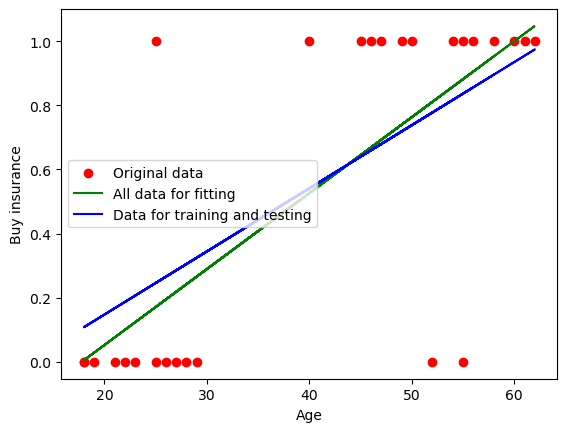

In [49]:
%matplotlib inline
plt.xlabel("Age")
plt.ylabel("Buy insurance")
plt.scatter(df1.age, df1.bought_insurance, color='r', marker='o', label="Original data")

all_data_4_fitting = model1.coef_*df1.age + model1.intercept_
plt.plot(df1.age, all_data_4_fitting, color='g', label="All data for fitting")

data_4_train_test = model2.coef_ * df1.age + model2.intercept_
plt.plot(df1.age, data_4_train_test, color='b', label="Data for training and testing")

plt.legend(loc="center left")
plt.show()

### 1.2 Logistic Regression

In [59]:
model3 = LogisticRegression()
model3.fit(df1[["age"]], df1.bought_insurance)
print(model3.score(df1[["age"]], df1.bought_insurance))
print(model3.coef_, model3.intercept_)

0.8888888888888888
[[0.1354656]] [-5.26279696]


In [60]:
model4 = LogisticRegression()
model4.fit(x_train, y_train)
print(model4.score(x_train, y_train))
print(model4.score(x_test, y_test))
print(model4.coef_, model4.intercept_)

0.8333333333333334
1.0
[[0.0992946]] [-3.74830775]


In [70]:
model4.predict_proba(x_test) # 1st for not buy and 2nd for buy

array([[0.09891235, 0.90108765],
       [0.14037365, 0.85962635],
       [0.86549617, 0.13450383],
       [0.7625386 , 0.2374614 ],
       [0.72473242, 0.27526758],
       [0.78004741, 0.21995259],
       [0.28525576, 0.71474424],
       [0.74409329, 0.25590671],
       [0.22856665, 0.77143335]])

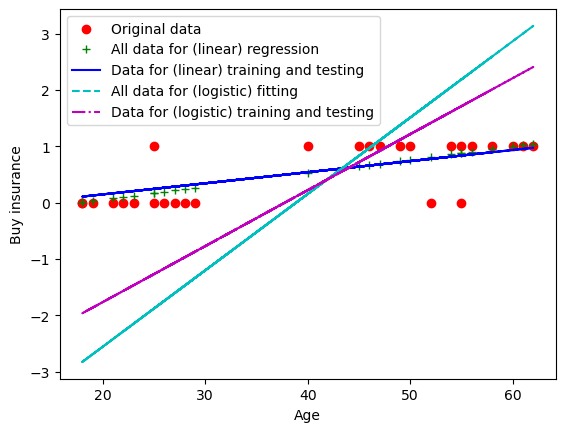

In [69]:
%matplotlib inline
plt.xlabel("Age")
plt.ylabel("Buy insurance")
plt.scatter(df1.age, df1.bought_insurance, color='r', marker='o', label="Original data")

# linear regression
all_data_4_linear_fitting = model1.coef_ * df1.age + model1.intercept_
plt.plot(df1.age, all_data_4_linear_fitting, 'g+', label="All data for (linear) regression")

data_4_linear_train_test = model2.coef_ * df1.age + model2.intercept_
plt.plot(df1.age, data_4_linear_train_test, 'b-', label="Data for (linear) training and testing")

# logistic regression
all_data_4_logistic_fitting = model3.coef_[0] * df1.age + model3.intercept_
plt.plot(df1.age, all_data_4_logistic_fitting, 'c--', label="All data for (logistic) fitting")

data_4_logistic_train_test = model4.coef_[0] * df1.age + model4.intercept_
plt.plot(df1.age, data_4_logistic_train_test, 'm-.', label="Data for (logistic) training and testing")

plt.legend(loc="upper left")
plt.show()